In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/Fall 2020/NYU_Team18_Accern_Capstone_Fall2020/'

[Errno 2] No such file or directory: '/content/drive/My Drive/Fall 2020/NYU_Team18_Accern_Capstone_Fall2020/'
/content


In [ ]:
cd '/content/drive/My Drive/Fall 2020/1006 Capstone/NYU_Team18_Accern_Capstone_Fall2020/'

/content/drive/My Drive/Fall 2020/1006 Capstone/NYU_Team18_Accern_Capstone_Fall2020


In [ ]:
!pip install transformers
!pip install pytorch-lightning==1.0.8

     |████████████████████████████████| 1.4MB 13.4MB/s 
     |████████████████████████████████| 890kB 62.7MB/s 
     |████████████████████████████████| 2.9MB 60.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=29b87199a9a96eddfb2b1a4fb44b2c20779ddb22cb91276db1adb02fd637c591
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 563kB 13.9MB/s 
     |████████████████████████████████| 102kB 14.5MB/s 
     |████████████████████████████████| 829kB 29.7MB/s 
     |████████████████████████████████| 276kB 56.7MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=7925517a570db4ed65e281455ad9c4dccba8a9b72362f54282699f6c8782b81b
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for PyYAML: filename=PyYAML-5.3.1-

In [ ]:
import numpy as np
import pandas as pd
import torch#
# from read_test_data import *
# from FinSentiment_old import *
from read_data import *
from FinSentiment import *

## Final Test set 

22375 slops do not have description

In [ ]:
def evaluate_model(model, tokenizer, trainer, existing_company_only, dir_path='data/',batch_size=16, num_workers=4):
    
    test_ids,X_test,y_test, _ = read_test_data('correct', dir_path=dir_path, existing_company_only=existing_company_only, sample=None)
    correct_test_dataloader = tokenize_and_dataloader(X_test, y_test, tokenizer, test_ids, batch_size, num_workers, random=False)

    test_ids,X_test,y_test, _ = read_test_data('inverse', dir_path=dir_path, existing_company_only=existing_company_only, sample=None)
    inverse_test_dataloader = tokenize_and_dataloader(X_test, y_test, tokenizer, test_ids, batch_size, num_workers, random=False)

    test_ids,X_test,y_test, _ = read_test_data('boundary', dir_path=dir_path, existing_company_only=existing_company_only, sample=None)
    boundary_test_dataloader = tokenize_and_dataloader(X_test, y_test, tokenizer, test_ids, batch_size, num_workers, random=False)

    model.incorrect_type = 'correct'
    trainer.test(model, correct_test_dataloader)

    model.incorrect_type = 'inverse'
    trainer.test(model, inverse_test_dataloader)

    model.incorrect_type = 'boundary'
    trainer.test(model, boundary_test_dataloader)


## Train on Full Data

In [ ]:
pretrained_bert_name = 'distilbert-base-cased'
existing_company_only = False
tokenizer = DistilBertTokenizer.from_pretrained(pretrained_bert_name)
trainer = pl.Trainer(progress_bar_refresh_rate=20, gpus=1)

GPU available: True, used: True
GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


#### Baseline

In [ ]:
model_name = 'distilbert-base-cased_inverse_nullfull_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/null/{model_name}/{model_name}_last.ckpt')

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model



[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (8) and target (5) number of classes
  warnings.warn(*args, **kwargs)


[MODEL NAME]: distilbert-base-cased_inverse_null 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7862
	Weighted Accuracy: 	0.8132
	F1 Score: 		0.7862
	AUC_SCORE[CLS 0]: 	0.9772
	AUC_SCORE[CLS 1]: 	0.8229
	AUC_SCORE[CLS 2]: 	0.9248
	AUC_SCORE[CLS 3]: 	0.9139
	AUC_SCORE[CLS 4]: 	0.9847

Confusion Matrix


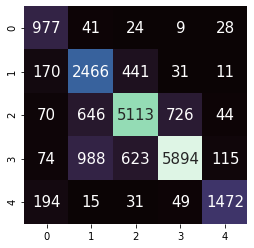

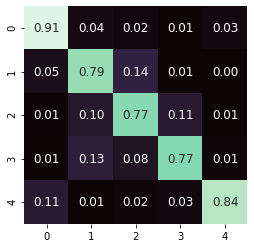

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_null 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7175
	Weighted Accuracy: 	0.7225
	F1 Score: 		0.7175
	AUC_SCORE[CLS 0]: 	0.9641
	AUC_SCORE[CLS 1]: 	0.7824
	AUC_SCORE[CLS 2]: 	0.9232
	AUC_SCORE[CLS 3]: 	0.8660
	AUC_SCORE[CLS 4]: 	0.9758

Confusion Matrix


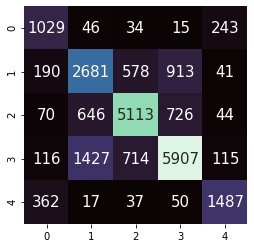

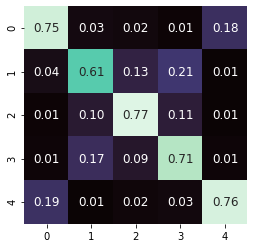

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_null 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7992
	Drop Total Sample: 		3407.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_inverse_null 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7752
	Weighted Accuracy: 	0.8002
	F1 Score: 		0.7752
	AUC_SCORE[CLS 0]: 	0.9728
	AUC_SCORE[CLS 1]: 	0.8128
	AUC_SCORE[CLS 2]: 	0.9187
	AUC_SCORE[CLS 3]: 	0.9111
	AUC_SCORE[CLS 4]: 	0.9839

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (9) and target (5) number of classes
  warnings.warn(*args, **kwargs)


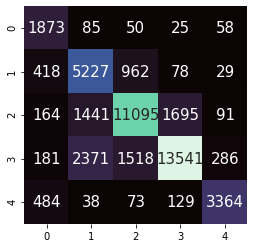

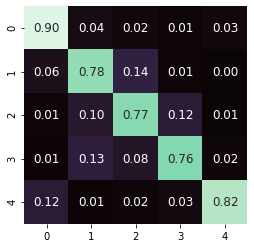

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_null 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7096
	Weighted Accuracy: 	0.7115
	F1 Score: 		0.7096
	AUC_SCORE[CLS 0]: 	0.9593
	AUC_SCORE[CLS 1]: 	0.7766
	AUC_SCORE[CLS 2]: 	0.9180
	AUC_SCORE[CLS 3]: 	0.8622
	AUC_SCORE[CLS 4]: 	0.9751

Confusion Matrix


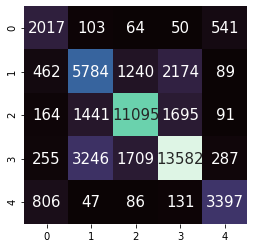

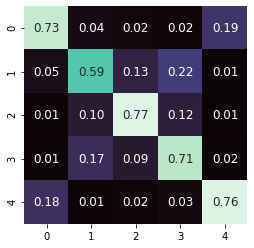

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_null 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7935
	Drop Total Sample: 		7819.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

In [ ]:
model_name = 'distilbert-base-cased_correct_nullfull_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/null/{model_name}/{model_name}_last.ckpt')

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model



[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (13) and target (5) number of classes
  warnings.warn(*args, **kwargs)


[MODEL NAME]: distilbert-base-cased_correct_null 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8401
	Weighted Accuracy: 	0.8634
	F1 Score: 		0.8401
	AUC_SCORE[CLS 0]: 	0.9917
	AUC_SCORE[CLS 1]: 	0.9660
	AUC_SCORE[CLS 2]: 	0.8843
	AUC_SCORE[CLS 3]: 	0.9425
	AUC_SCORE[CLS 4]: 	0.9931

Confusion Matrix


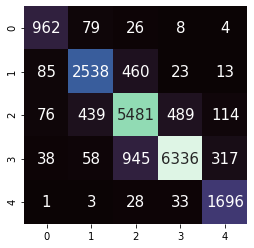

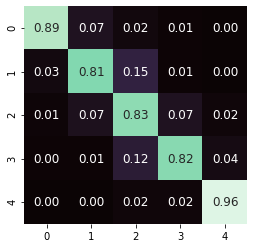

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_null 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7533
	Weighted Accuracy: 	0.7336
	F1 Score: 		0.7533
	AUC_SCORE[CLS 0]: 	0.8005
	AUC_SCORE[CLS 1]: 	0.7963
	AUC_SCORE[CLS 2]: 	0.8819
	AUC_SCORE[CLS 3]: 	0.8559
	AUC_SCORE[CLS 4]: 	0.9020

Confusion Matrix


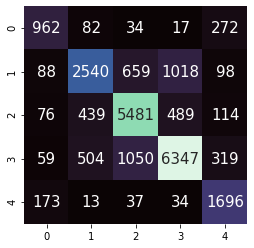

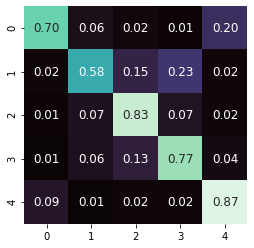

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_null 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8400
	Drop Total Sample: 		3459.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_correct_null 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8310
	Weighted Accuracy: 	0.8525
	F1 Score: 		0.8310
	AUC_SCORE[CLS 0]: 	0.9858
	AUC_SCORE[CLS 1]: 	0.9639
	AUC_SCORE[CLS 2]: 	0.8776
	AUC_SCORE[CLS 3]: 	0.9384
	AUC_SCORE[CLS 4]: 	0.9917

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (13) and target (5) number of classes
  warnings.warn(*args, **kwargs)


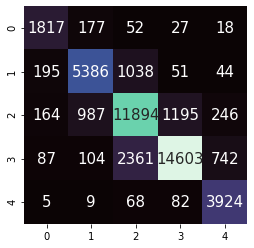

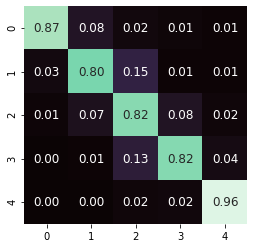

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_null 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7448
	Weighted Accuracy: 	0.7185
	F1 Score: 		0.7448
	AUC_SCORE[CLS 0]: 	0.7638
	AUC_SCORE[CLS 1]: 	0.7899
	AUC_SCORE[CLS 2]: 	0.8763
	AUC_SCORE[CLS 3]: 	0.8533
	AUC_SCORE[CLS 4]: 	0.9135

Confusion Matrix


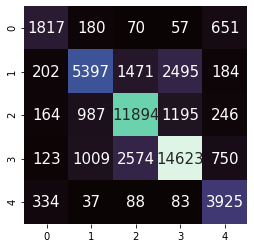

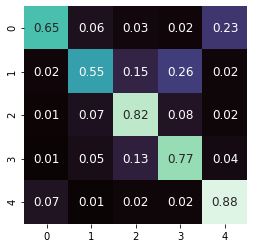

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_null 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8368
	Drop Total Sample: 		8056.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

In [ ]:
model_name = 'distilbert-base-cased_boundary_nullfull_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/null/{model_name}/{model_name}_last.ckpt')

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


[MODEL NAME]: distilbert-base-cased_boundary_null 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7659
	Weighted Accuracy: 	0.7666
	F1 Score: 		0.7659
	AUC_SCORE[CLS 0]: 	0.9179
	AUC_SCORE[CLS 1]: 	0.9034
	AUC_SCORE[CLS 2]: 	0.8773
	AUC_SCORE[CLS 3]: 	0.9279
	AUC_SCORE[CLS 4]: 	0.9631

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (8) and target (5) number of classes
  warnings.warn(*args, **kwargs)


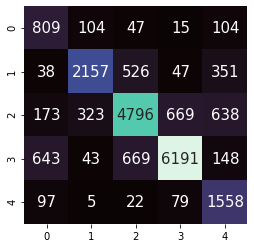

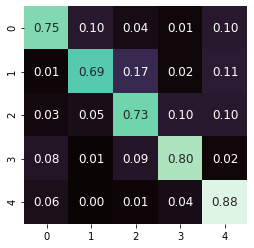

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_null 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6895
	Weighted Accuracy: 	0.6751
	F1 Score: 		0.6895
	AUC_SCORE[CLS 0]: 	0.7900
	AUC_SCORE[CLS 1]: 	0.7932
	AUC_SCORE[CLS 2]: 	0.8767
	AUC_SCORE[CLS 3]: 	0.8655
	AUC_SCORE[CLS 4]: 	0.9170

Confusion Matrix


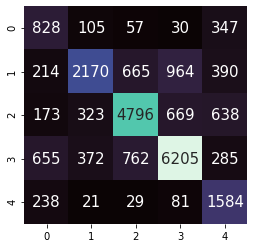

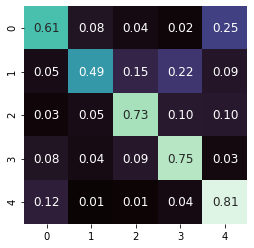

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_null 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7787
	Drop Total Sample: 		3058.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_boundary_null 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7571
	Weighted Accuracy: 	0.7574
	F1 Score: 		0.7571
	AUC_SCORE[CLS 0]: 	0.9187
	AUC_SCORE[CLS 1]: 	0.8977
	AUC_SCORE[CLS 2]: 	0.8727
	AUC_SCORE[CLS 3]: 	0.9225
	AUC_SCORE[CLS 4]: 	0.9603

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (8) and target (5) number of classes
  warnings.warn(*args, **kwargs)


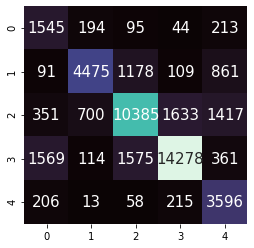

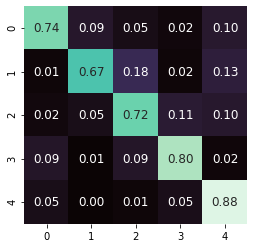

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_null 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6812
	Weighted Accuracy: 	0.6652
	F1 Score: 		0.6812
	AUC_SCORE[CLS 0]: 	0.7733
	AUC_SCORE[CLS 1]: 	0.7802
	AUC_SCORE[CLS 2]: 	0.8725
	AUC_SCORE[CLS 3]: 	0.8588
	AUC_SCORE[CLS 4]: 	0.9199

Confusion Matrix


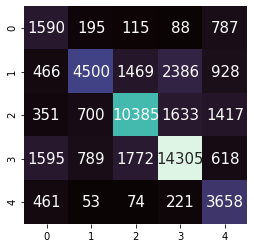

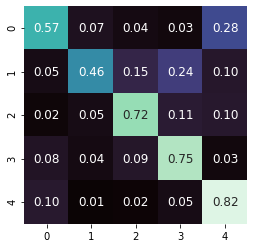

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_null 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7709
	Drop Total Sample: 		7024.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

#### Method 3

In [ ]:
model_name = 'distilbert-base-cased_correct_concat_full_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/concat/{model_name}/{model_name}_last.ckpt')

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


[MODEL NAME]: distilbert-base-cased_correct_concat 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8514
	Weighted Accuracy: 	0.8522
	F1 Score: 		0.8514
	AUC_SCORE[CLS 0]: 	0.9881
	AUC_SCORE[CLS 1]: 	0.9688
	AUC_SCORE[CLS 2]: 	0.9013
	AUC_SCORE[CLS 3]: 	0.9552
	AUC_SCORE[CLS 4]: 	0.9901

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (14) and target (5) number of classes
  warnings.warn(*args, **kwargs)


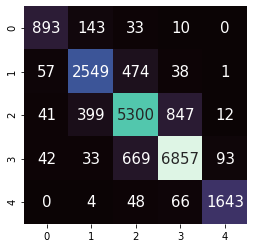

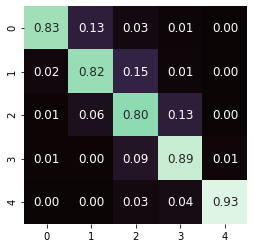

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_concat 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7635
	Weighted Accuracy: 	0.7240
	F1 Score: 		0.7635
	AUC_SCORE[CLS 0]: 	0.8492
	AUC_SCORE[CLS 1]: 	0.7995
	AUC_SCORE[CLS 2]: 	0.9005
	AUC_SCORE[CLS 3]: 	0.8719
	AUC_SCORE[CLS 4]: 	0.8945

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (14) and target (5) number of classes
  warnings.warn(*args, **kwargs)


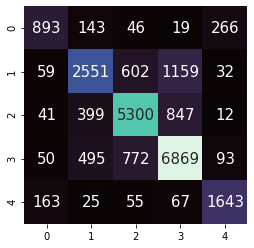

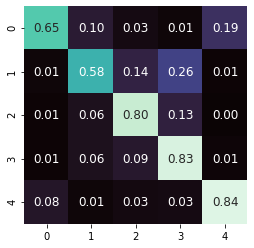

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_concat 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8438
	Drop Total Sample: 		3295.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_correct_concat 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8457
	Weighted Accuracy: 	0.8488
	F1 Score: 		0.8457
	AUC_SCORE[CLS 0]: 	0.9839
	AUC_SCORE[CLS 1]: 	0.9684
	AUC_SCORE[CLS 2]: 	0.8929
	AUC_SCORE[CLS 3]: 	0.9529
	AUC_SCORE[CLS 4]: 	0.9883

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (14) and target (5) number of classes
  warnings.warn(*args, **kwargs)


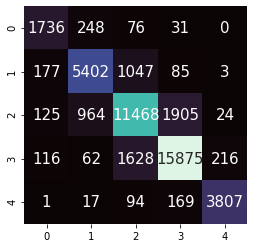

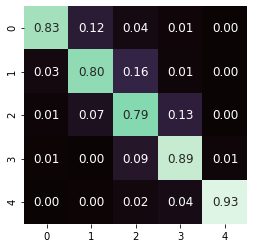

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_concat 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7581
	Weighted Accuracy: 	0.7155
	F1 Score: 		0.7581
	AUC_SCORE[CLS 0]: 	0.8213
	AUC_SCORE[CLS 1]: 	0.7926
	AUC_SCORE[CLS 2]: 	0.8926
	AUC_SCORE[CLS 3]: 	0.8699
	AUC_SCORE[CLS 4]: 	0.9047

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (14) and target (5) number of classes
  warnings.warn(*args, **kwargs)


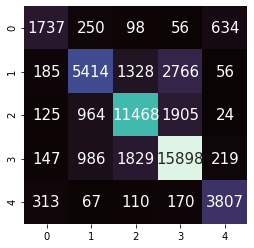

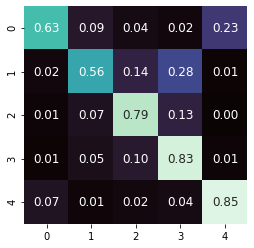

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_concat 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8409
	Drop Total Sample: 		7531.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

In [ ]:
model_name = 'distilbert-base-cased_inverse_concat_full_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/concat/{model_name}/{model_name}_last.ckpt')



[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


[MODEL NAME]: distilbert-base-cased_inverse_concat 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7559
	Weighted Accuracy: 	0.7857
	F1 Score: 		0.7559
	AUC_SCORE[CLS 0]: 	0.9779
	AUC_SCORE[CLS 1]: 	0.8851
	AUC_SCORE[CLS 2]: 	0.8916
	AUC_SCORE[CLS 3]: 	0.9119
	AUC_SCORE[CLS 4]: 	0.9797

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (11) and target (5) number of classes
  warnings.warn(*args, **kwargs)


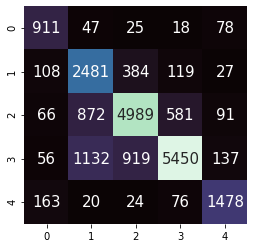

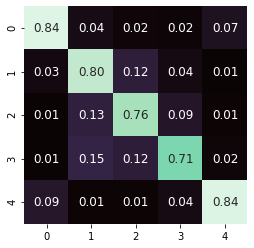

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_concat 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6955
	Weighted Accuracy: 	0.7032
	F1 Score: 		0.6955
	AUC_SCORE[CLS 0]: 	0.9565
	AUC_SCORE[CLS 1]: 	0.8195
	AUC_SCORE[CLS 2]: 	0.8916
	AUC_SCORE[CLS 3]: 	0.8648
	AUC_SCORE[CLS 4]: 	0.9665

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (11) and target (5) number of classes
  warnings.warn(*args, **kwargs)


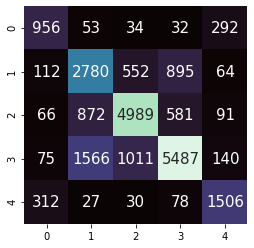

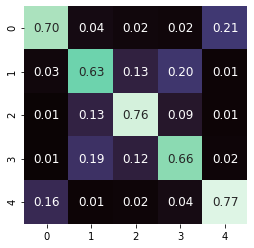

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_concat 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7888
	Drop Total Sample: 		3797.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)


[MODEL NAME]: distilbert-base-cased_inverse_concat 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7629
	Weighted Accuracy: 	0.7969
	F1 Score: 		0.7629
	AUC_SCORE[CLS 0]: 	0.9738
	AUC_SCORE[CLS 1]: 	0.8655
	AUC_SCORE[CLS 2]: 	0.8964
	AUC_SCORE[CLS 3]: 	0.9108
	AUC_SCORE[CLS 4]: 	0.9821

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (11) and target (5) number of classes
  warnings.warn(*args, **kwargs)


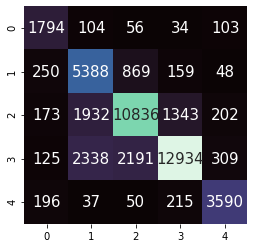

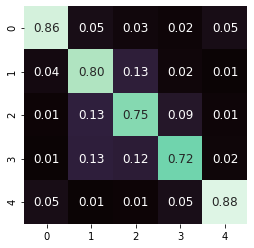

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_concat 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6991
	Weighted Accuracy: 	0.7049
	F1 Score: 		0.6991
	AUC_SCORE[CLS 0]: 	0.9542
	AUC_SCORE[CLS 1]: 	0.8048
	AUC_SCORE[CLS 2]: 	0.8967
	AUC_SCORE[CLS 3]: 	0.8626
	AUC_SCORE[CLS 4]: 	0.9699

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (11) and target (5) number of classes
  warnings.warn(*args, **kwargs)


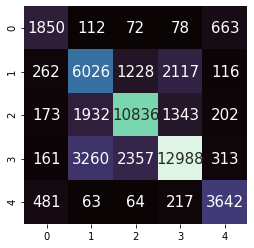

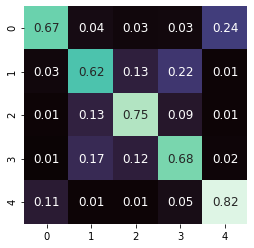

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_concat 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7943
	Drop Total Sample: 		8571.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

In [ ]:
model_name = 'distilbert-base-cased_boundary_concat_full_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/concat/{model_name}/{model_name}_last.ckpt')



[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


[MODEL NAME]: distilbert-base-cased_boundary_concat 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7481
	Weighted Accuracy: 	0.7547
	F1 Score: 		0.7481
	AUC_SCORE[CLS 0]: 	0.9297
	AUC_SCORE[CLS 1]: 	0.9178
	AUC_SCORE[CLS 2]: 	0.8890
	AUC_SCORE[CLS 3]: 	0.9116
	AUC_SCORE[CLS 4]: 	0.9465

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (11) and target (5) number of classes
  warnings.warn(*args, **kwargs)


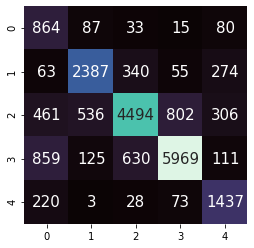

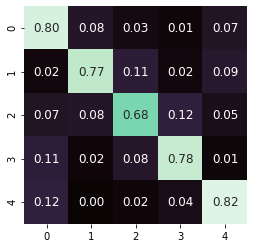

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_concat 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6758
	Weighted Accuracy: 	0.6682
	F1 Score: 		0.6758
	AUC_SCORE[CLS 0]: 	0.8541
	AUC_SCORE[CLS 1]: 	0.8066
	AUC_SCORE[CLS 2]: 	0.8892
	AUC_SCORE[CLS 3]: 	0.8533
	AUC_SCORE[CLS 4]: 	0.8930

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (11) and target (5) number of classes
  warnings.warn(*args, **kwargs)


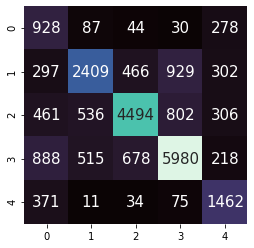

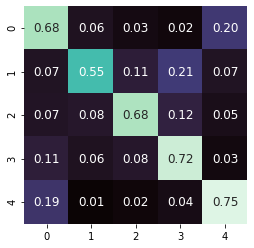

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_concat 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7665
	Drop Total Sample: 		3117.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)



[MODEL NAME]: distilbert-base-cased_boundary_concat 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7586
	Weighted Accuracy: 	0.7639
	F1 Score: 		0.7586
	AUC_SCORE[CLS 0]: 	0.9276
	AUC_SCORE[CLS 1]: 	0.9131
	AUC_SCORE[CLS 2]: 	0.8895
	AUC_SCORE[CLS 3]: 	0.9209
	AUC_SCORE[CLS 4]: 	0.9545

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (11) and target (5) number of classes
  warnings.warn(*args, **kwargs)


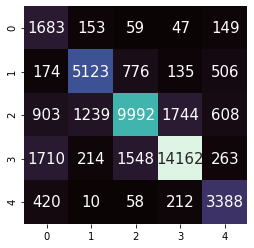

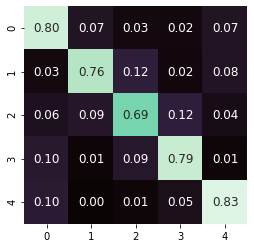

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_concat 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6843
	Weighted Accuracy: 	0.6735
	F1 Score: 		0.6843
	AUC_SCORE[CLS 0]: 	0.8396
	AUC_SCORE[CLS 1]: 	0.7960
	AUC_SCORE[CLS 2]: 	0.8901
	AUC_SCORE[CLS 3]: 	0.8605
	AUC_SCORE[CLS 4]: 	0.9090

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (11) and target (5) number of classes
  warnings.warn(*args, **kwargs)


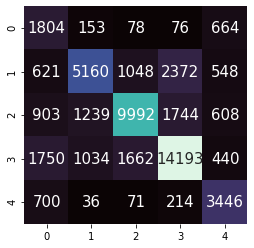

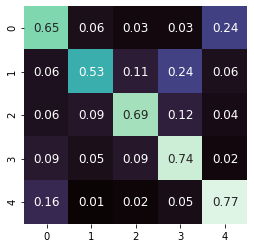

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_concat 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7751
	Drop Total Sample: 		7138.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

#### Method 2

In [ ]:
model_name = 'distilbert-base-cased_correct_sum_output_cpy_wt1_full_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/sum_output/{model_name}/{model_name}_last.ckpt')

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (14) and target (5) number of classes
  warnings.warn(*args, **kwargs)


[MODEL NAME]: distilbert-base-cased_correct_sum_output 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8504
	Weighted Accuracy: 	0.8639
	F1 Score: 		0.8504
	AUC_SCORE[CLS 0]: 	0.9878
	AUC_SCORE[CLS 1]: 	0.9698
	AUC_SCORE[CLS 2]: 	0.9184
	AUC_SCORE[CLS 3]: 	0.9527
	AUC_SCORE[CLS 4]: 	0.9920

Confusion Matrix


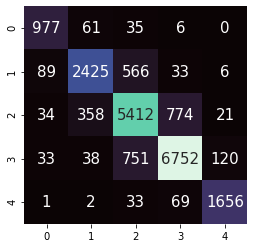

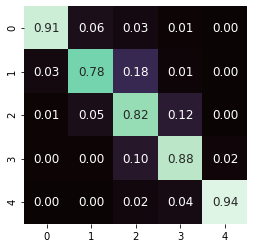

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_sum_output 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7627
	Weighted Accuracy: 	0.7340
	F1 Score: 		0.7627
	AUC_SCORE[CLS 0]: 	0.7999
	AUC_SCORE[CLS 1]: 	0.7839
	AUC_SCORE[CLS 2]: 	0.9165
	AUC_SCORE[CLS 3]: 	0.8674
	AUC_SCORE[CLS 4]: 	0.8996

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (14) and target (5) number of classes
  warnings.warn(*args, **kwargs)


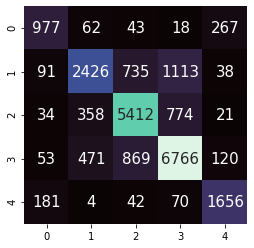

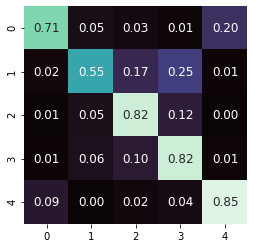

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_sum_output 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8471
	Drop Total Sample: 		3400.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_correct_sum_output 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8468
	Weighted Accuracy: 	0.8576
	F1 Score: 		0.8468
	AUC_SCORE[CLS 0]: 	0.9846
	AUC_SCORE[CLS 1]: 	0.9697
	AUC_SCORE[CLS 2]: 	0.9141
	AUC_SCORE[CLS 3]: 	0.9514
	AUC_SCORE[CLS 4]: 	0.9905

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (14) and target (5) number of classes
  warnings.warn(*args, **kwargs)


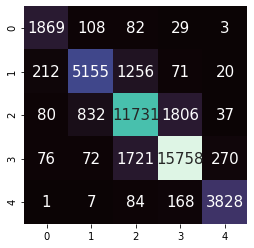

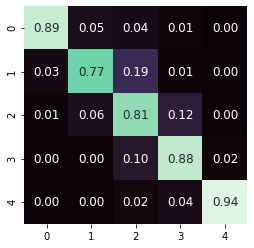

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_sum_output 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7590
	Weighted Accuracy: 	0.7227
	F1 Score: 		0.7590
	AUC_SCORE[CLS 0]: 	0.7656
	AUC_SCORE[CLS 1]: 	0.7741
	AUC_SCORE[CLS 2]: 	0.9131
	AUC_SCORE[CLS 3]: 	0.8678
	AUC_SCORE[CLS 4]: 	0.9099

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (14) and target (5) number of classes
  warnings.warn(*args, **kwargs)


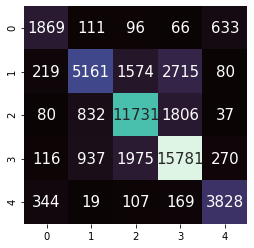

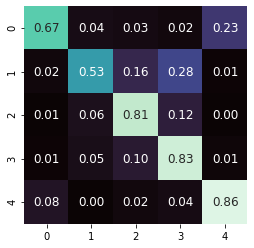

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_sum_output 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8433
	Drop Total Sample: 		7616.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

In [ ]:
model_name = 'distilbert-base-cased_inverse_sum_output_cpy_wt1_full_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/sum_output/{model_name}/{model_name}_last.ckpt')

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (10) and target (5) number of classes
  warnings.warn(*args, **kwargs)


[MODEL NAME]: distilbert-base-cased_inverse_sum_output 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7729
	Weighted Accuracy: 	0.8099
	F1 Score: 		0.7729
	AUC_SCORE[CLS 0]: 	0.9825
	AUC_SCORE[CLS 1]: 	0.8936
	AUC_SCORE[CLS 2]: 	0.8843
	AUC_SCORE[CLS 3]: 	0.9291
	AUC_SCORE[CLS 4]: 	0.9887

Confusion Matrix


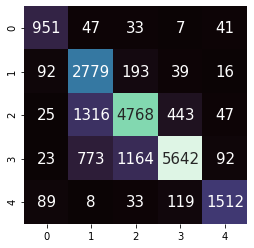

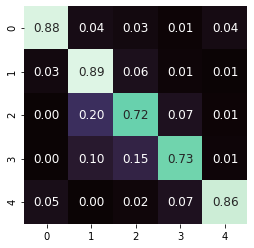

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_output 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7038
	Weighted Accuracy: 	0.7142
	F1 Score: 		0.7038
	AUC_SCORE[CLS 0]: 	0.9634
	AUC_SCORE[CLS 1]: 	0.8151
	AUC_SCORE[CLS 2]: 	0.8843
	AUC_SCORE[CLS 3]: 	0.8826
	AUC_SCORE[CLS 4]: 	0.9772

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (10) and target (5) number of classes
  warnings.warn(*args, **kwargs)


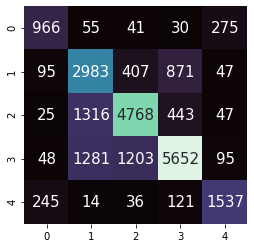

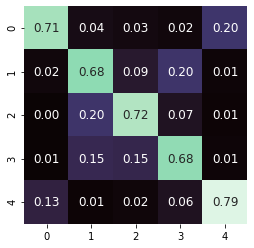

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_output 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8132
	Drop Total Sample: 		4183.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_inverse_sum_output 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7748
	Weighted Accuracy: 	0.8096
	F1 Score: 		0.7748
	AUC_SCORE[CLS 0]: 	0.9772
	AUC_SCORE[CLS 1]: 	0.8838
	AUC_SCORE[CLS 2]: 	0.8819
	AUC_SCORE[CLS 3]: 	0.9236
	AUC_SCORE[CLS 4]: 	0.9869

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (10) and target (5) number of classes
  warnings.warn(*args, **kwargs)


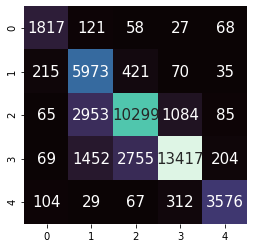

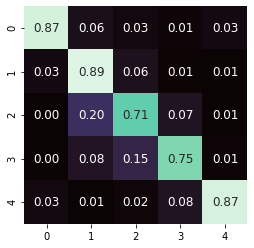

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_output 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7034
	Weighted Accuracy: 	0.7076
	F1 Score: 		0.7034
	AUC_SCORE[CLS 0]: 	0.9562
	AUC_SCORE[CLS 1]: 	0.8068
	AUC_SCORE[CLS 2]: 	0.8819
	AUC_SCORE[CLS 3]: 	0.8746
	AUC_SCORE[CLS 4]: 	0.9770

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (10) and target (5) number of classes
  warnings.warn(*args, **kwargs)


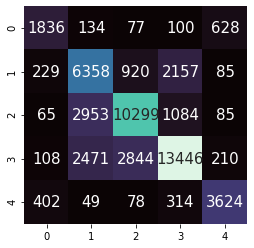

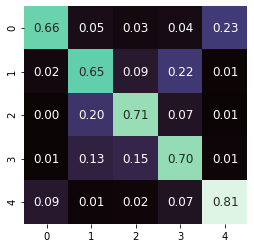

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_output 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8180
	Drop Total Sample: 		9615.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

In [ ]:
model_name = 'distilbert-base-cased_boundary_sum_output_cpy_wt1_full_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/sum_output/{model_name}/{model_name}_last.ckpt')

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (10) and target (5) number of classes
  warnings.warn(*args, **kwargs)


[MODEL NAME]: distilbert-base-cased_boundary_sum_output 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7591
	Weighted Accuracy: 	0.7616
	F1 Score: 		0.7591
	AUC_SCORE[CLS 0]: 	0.9183
	AUC_SCORE[CLS 1]: 	0.9209
	AUC_SCORE[CLS 2]: 	0.8697
	AUC_SCORE[CLS 3]: 	0.9257
	AUC_SCORE[CLS 4]: 	0.9594

Confusion Matrix


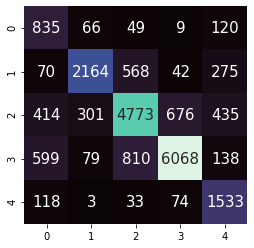

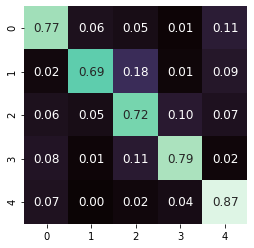

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_output 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6841
	Weighted Accuracy: 	0.6720
	F1 Score: 		0.6841
	AUC_SCORE[CLS 0]: 	0.8193
	AUC_SCORE[CLS 1]: 	0.8222
	AUC_SCORE[CLS 2]: 	0.8695
	AUC_SCORE[CLS 3]: 	0.8653
	AUC_SCORE[CLS 4]: 	0.9337

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (10) and target (5) number of classes
  warnings.warn(*args, **kwargs)


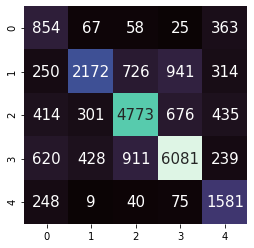

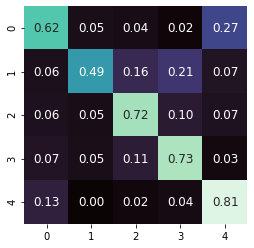

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_output 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7767
	Drop Total Sample: 		3213.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_boundary_sum_output 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7676
	Weighted Accuracy: 	0.7685
	F1 Score: 		0.7676
	AUC_SCORE[CLS 0]: 	0.9112
	AUC_SCORE[CLS 1]: 	0.9111
	AUC_SCORE[CLS 2]: 	0.8677
	AUC_SCORE[CLS 3]: 	0.9288
	AUC_SCORE[CLS 4]: 	0.9594

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (10) and target (5) number of classes
  warnings.warn(*args, **kwargs)


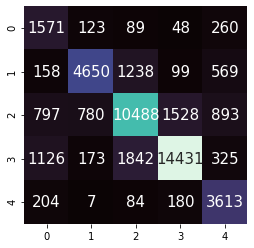

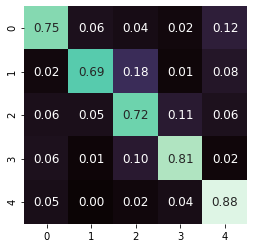

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_output 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6915
	Weighted Accuracy: 	0.6764
	F1 Score: 		0.6915
	AUC_SCORE[CLS 0]: 	0.7849
	AUC_SCORE[CLS 1]: 	0.8109
	AUC_SCORE[CLS 2]: 	0.8672
	AUC_SCORE[CLS 3]: 	0.8668
	AUC_SCORE[CLS 4]: 	0.9362

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (10) and target (5) number of classes
  warnings.warn(*args, **kwargs)


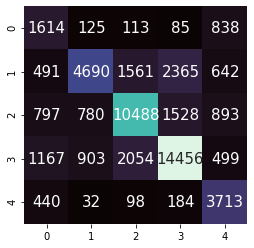

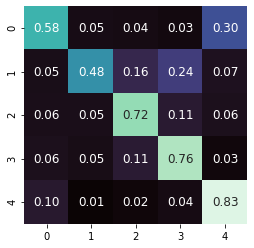

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_output 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7832
	Drop Total Sample: 		7277.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

#### Method 1

In [ ]:
model_name = 'distilbert-base-cased_correct_sum_embedding_cpy_wt1_full_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/sum_embedding/{model_name}/{model_name}_last.ckpt')

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (12) and target (5) number of classes
  warnings.warn(*args, **kwargs)


[MODEL NAME]: distilbert-base-cased_correct_sum_embedding 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8359
	Weighted Accuracy: 	0.8669
	F1 Score: 		0.8359
	AUC_SCORE[CLS 0]: 	0.9908
	AUC_SCORE[CLS 1]: 	0.9689
	AUC_SCORE[CLS 2]: 	0.9012
	AUC_SCORE[CLS 3]: 	0.9500
	AUC_SCORE[CLS 4]: 	0.9886

Confusion Matrix


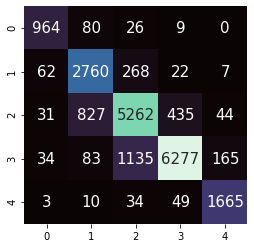

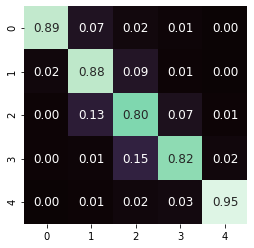

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_sum_embedding 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7497
	Weighted Accuracy: 	0.7369
	F1 Score: 		0.7497
	AUC_SCORE[CLS 0]: 	0.7992
	AUC_SCORE[CLS 1]: 	0.7726
	AUC_SCORE[CLS 2]: 	0.8991
	AUC_SCORE[CLS 3]: 	0.8642
	AUC_SCORE[CLS 4]: 	0.8930

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (12) and target (5) number of classes
  warnings.warn(*args, **kwargs)


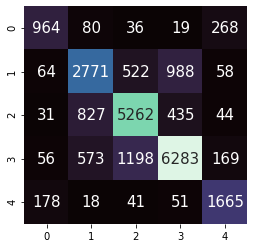

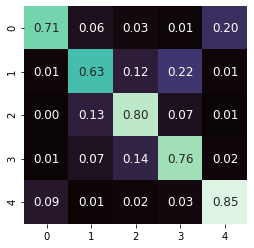

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_sum_embedding 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8456
	Drop Total Sample: 		3706.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_correct_sum_embedding 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8260
	Weighted Accuracy: 	0.8560
	F1 Score: 		0.8260
	AUC_SCORE[CLS 0]: 	0.9862
	AUC_SCORE[CLS 1]: 	0.9667
	AUC_SCORE[CLS 2]: 	0.8930
	AUC_SCORE[CLS 3]: 	0.9455
	AUC_SCORE[CLS 4]: 	0.9880

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (12) and target (5) number of classes
  warnings.warn(*args, **kwargs)


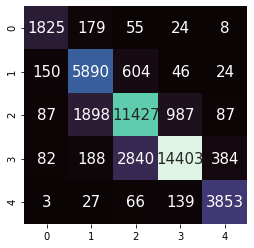

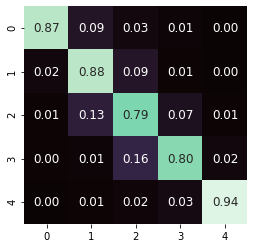

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_sum_embedding 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7403
	Weighted Accuracy: 	0.7216
	F1 Score: 		0.7403
	AUC_SCORE[CLS 0]: 	0.7642
	AUC_SCORE[CLS 1]: 	0.7591
	AUC_SCORE[CLS 2]: 	0.8921
	AUC_SCORE[CLS 3]: 	0.8606
	AUC_SCORE[CLS 4]: 	0.9050

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (12) and target (5) number of classes
  warnings.warn(*args, **kwargs)


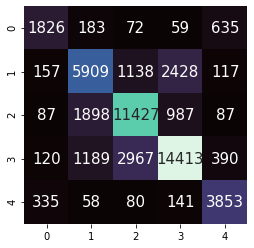

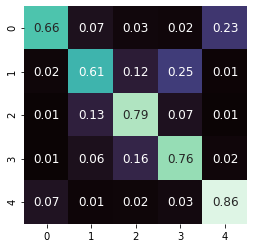

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_sum_embedding 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8409
	Drop Total Sample: 		8593.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

In [ ]:
model_name = 'distilbert-base-cased_inverse_sum_embedding_cpy_wt1_full_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/sum_embedding/{model_name}/{model_name}_last.ckpt')


[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model



[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (8) and target (5) number of classes
  warnings.warn(*args, **kwargs)


[MODEL NAME]: distilbert-base-cased_inverse_sum_embedding 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7922
	Weighted Accuracy: 	0.8161
	F1 Score: 		0.7922
	AUC_SCORE[CLS 0]: 	0.9772
	AUC_SCORE[CLS 1]: 	0.8850
	AUC_SCORE[CLS 2]: 	0.9142
	AUC_SCORE[CLS 3]: 	0.9020
	AUC_SCORE[CLS 4]: 	0.9888

Confusion Matrix


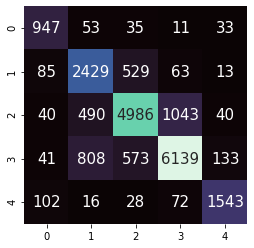

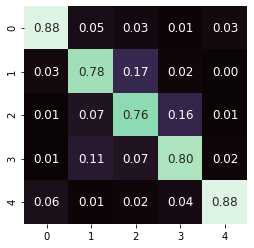

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_embedding 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7240
	Weighted Accuracy: 	0.7239
	F1 Score: 		0.7240
	AUC_SCORE[CLS 0]: 	0.9622
	AUC_SCORE[CLS 1]: 	0.8190
	AUC_SCORE[CLS 2]: 	0.9135
	AUC_SCORE[CLS 3]: 	0.8479
	AUC_SCORE[CLS 4]: 	0.9783

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (8) and target (5) number of classes
  warnings.warn(*args, **kwargs)


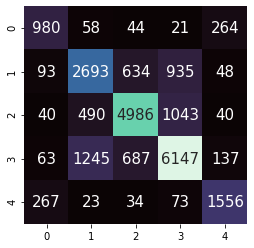

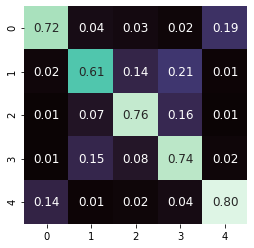

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_embedding 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8123
	Drop Total Sample: 		3580.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_inverse_sum_embedding 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7928
	Weighted Accuracy: 	0.8162
	F1 Score: 		0.7928
	AUC_SCORE[CLS 0]: 	0.9719
	AUC_SCORE[CLS 1]: 	0.8723
	AUC_SCORE[CLS 2]: 	0.9124
	AUC_SCORE[CLS 3]: 	0.9034
	AUC_SCORE[CLS 4]: 	0.9876

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (9) and target (5) number of classes
  warnings.warn(*args, **kwargs)


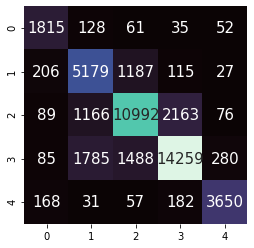

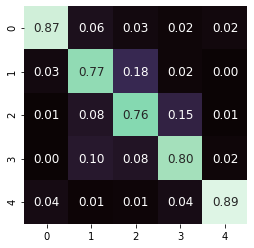

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_embedding 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7235
	Weighted Accuracy: 	0.7191
	F1 Score: 		0.7235
	AUC_SCORE[CLS 0]: 	0.9577
	AUC_SCORE[CLS 1]: 	0.8064
	AUC_SCORE[CLS 2]: 	0.9121
	AUC_SCORE[CLS 3]: 	0.8487
	AUC_SCORE[CLS 4]: 	0.9774

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (9) and target (5) number of classes
  warnings.warn(*args, **kwargs)


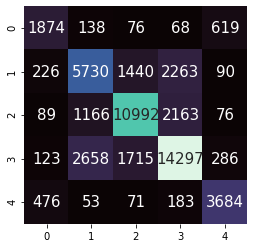

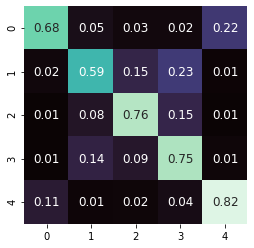

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_embedding 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8130
	Drop Total Sample: 		8083.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

In [ ]:
model_name = 'distilbert-base-cased_boundary_sum_embedding_cpy_wt1_full_data'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/sum_embedding/{model_name}/{model_name}_last.ckpt')

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization


Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (8) and target (5) number of classes
  warnings.warn(*args, **kwargs)


[MODEL NAME]: distilbert-base-cased_boundary_sum_embedding 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7500
	Weighted Accuracy: 	0.7626
	F1 Score: 		0.7500
	AUC_SCORE[CLS 0]: 	0.9418
	AUC_SCORE[CLS 1]: 	0.9246
	AUC_SCORE[CLS 2]: 	0.8713
	AUC_SCORE[CLS 3]: 	0.9136
	AUC_SCORE[CLS 4]: 	0.9581

Confusion Matrix


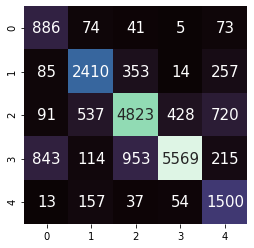

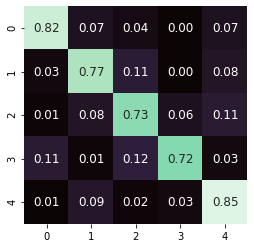

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_embedding 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6751
	Weighted Accuracy: 	0.6714
	F1 Score: 		0.6751
	AUC_SCORE[CLS 0]: 	0.8712
	AUC_SCORE[CLS 1]: 	0.8067
	AUC_SCORE[CLS 2]: 	0.8719
	AUC_SCORE[CLS 3]: 	0.8534
	AUC_SCORE[CLS 4]: 	0.9016

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (8) and target (5) number of classes
  warnings.warn(*args, **kwargs)


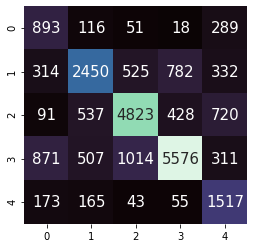

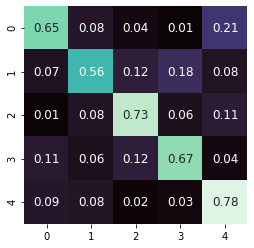

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_embedding 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7728
	Drop Total Sample: 		3246.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[MODEL NAME]: distilbert-base-cased_boundary_sum_embedding 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7485
	Weighted Accuracy: 	0.7624
	F1 Score: 		0.7485
	AUC_SCORE[CLS 0]: 	0.9400
	AUC_SCORE[CLS 1]: 	0.9235
	AUC_SCORE[CLS 2]: 	0.8725
	AUC_SCORE[CLS 3]: 	0.9205
	AUC_SCORE[CLS 4]: 	0.9604

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (8) and target (5) number of classes
  warnings.warn(*args, **kwargs)


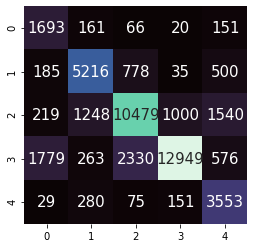

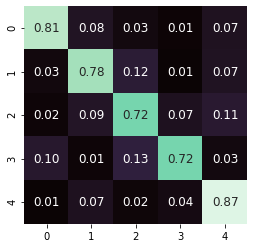

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_embedding 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6733
	Weighted Accuracy: 	0.6692
	F1 Score: 		0.6733
	AUC_SCORE[CLS 0]: 	0.8474
	AUC_SCORE[CLS 1]: 	0.7967
	AUC_SCORE[CLS 2]: 	0.8730
	AUC_SCORE[CLS 3]: 	0.8574
	AUC_SCORE[CLS 4]: 	0.9139

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (8) and target (5) number of classes
  warnings.warn(*args, **kwargs)


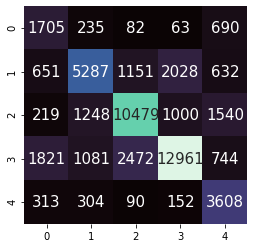

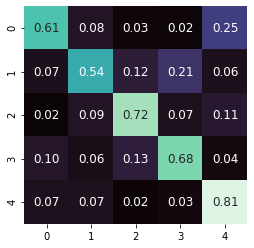

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_embedding 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7721
	Drop Total Sample: 		7573.0000
--------------------------------------------------------------------------------



In [ ]:
evaluate_model(model, tokenizer, trainer, existing_company_only=False, dir_path='data/',batch_size=16, num_workers=4)

## Train on Existing Company Only

In [ ]:
pretrained_bert_name = 'distilbert-base-cased'
existing_company_only = True
tokenizer = DistilBertTokenizer.from_pretrained(pretrained_bert_name)
trainer = pl.Trainer(progress_bar_refresh_rate=20, gpus=1)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


[MODEL NAME]: distilbert-base-cased_correct_null 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8203
	Weighted Accuracy: 	0.8447
	F1 Score: 		0.8203
	AUC_SCORE[CLS 0]: 	0.9827
	AUC_SCORE[CLS 1]: 	0.9544
	AUC_SCORE[CLS 2]: 	0.8823
	AUC_SCORE[CLS 3]: 	0.9389
	AUC_SCORE[CLS 4]: 	0.9889

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (13) and target (5) number of classes
  warnings.warn(*args, **kwargs)


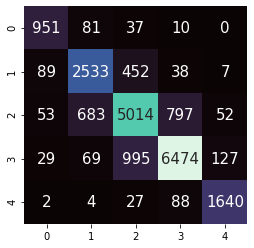

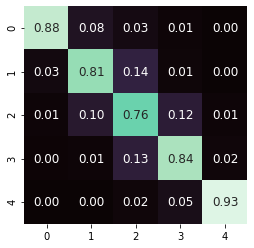

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_null 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7360
	Weighted Accuracy: 	0.7181
	F1 Score: 		0.7360
	AUC_SCORE[CLS 0]: 	0.7921
	AUC_SCORE[CLS 1]: 	0.7724
	AUC_SCORE[CLS 2]: 	0.8779
	AUC_SCORE[CLS 3]: 	0.8561
	AUC_SCORE[CLS 4]: 	0.8916

Confusion Matrix


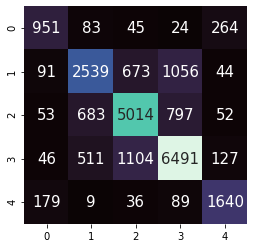

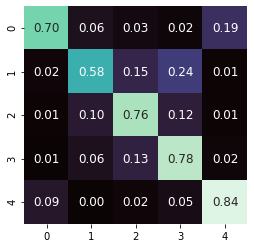

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_null 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8435
	Drop Total Sample: 		4020.0000
--------------------------------------------------------------------------------



In [ ]:
incorrect_type = 'correct'
company_embedding_method = 'null'
model_name = '_'.join([pretrained_bert_name, incorrect_type, company_embedding_method])
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/{model_name}/{model_name}_last.ckpt')
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


[MODEL NAME]: distilbert-base-cased_boundary_sum_embedding 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7222
	Weighted Accuracy: 	0.7205
	F1 Score: 		0.7222
	AUC_SCORE[CLS 0]: 	0.9326
	AUC_SCORE[CLS 1]: 	0.8778
	AUC_SCORE[CLS 2]: 	0.8263
	AUC_SCORE[CLS 3]: 	0.8946
	AUC_SCORE[CLS 4]: 	0.9509

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (7) and target (5) number of classes
  warnings.warn(*args, **kwargs)


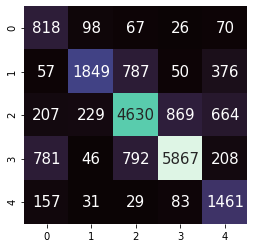

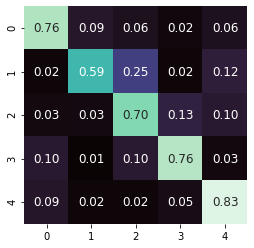

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_embedding 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6509
	Weighted Accuracy: 	0.6359
	F1 Score: 		0.6509
	AUC_SCORE[CLS 0]: 	0.8659
	AUC_SCORE[CLS 1]: 	0.7903
	AUC_SCORE[CLS 2]: 	0.8266
	AUC_SCORE[CLS 3]: 	0.8379
	AUC_SCORE[CLS 4]: 	0.9165

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (7) and target (5) number of classes
  warnings.warn(*args, **kwargs)


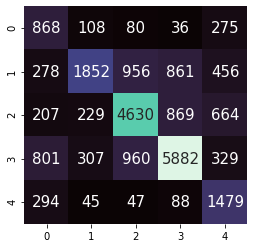

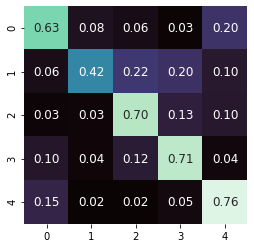

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_boundary_sum_embedding 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.7664
	Drop Total Sample: 		3784.0000
--------------------------------------------------------------------------------



In [ ]:
incorrect_type = 'boundary'
company_embedding_method = 'sum_output'
model_name = 'distilbert-base-cased_boundary_sum_embedding_cpy_wt1'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/{model_name}/{model_name}_last.ckpt')
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


[MODEL NAME]: distilbert-base-cased_correct_concat 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.8199
	Weighted Accuracy: 	0.8452
	F1 Score: 		0.8199
	AUC_SCORE[CLS 0]: 	0.9846
	AUC_SCORE[CLS 1]: 	0.9652
	AUC_SCORE[CLS 2]: 	0.8949
	AUC_SCORE[CLS 3]: 	0.9441
	AUC_SCORE[CLS 4]: 	0.9872

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (13) and target (5) number of classes
  warnings.warn(*args, **kwargs)


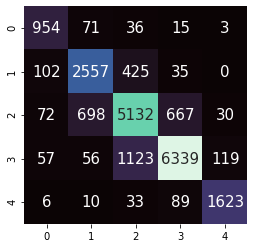

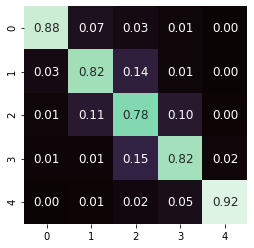

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_concat 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.7355
	Weighted Accuracy: 	0.7188
	F1 Score: 		0.7355
	AUC_SCORE[CLS 0]: 	0.8157
	AUC_SCORE[CLS 1]: 	0.7861
	AUC_SCORE[CLS 2]: 	0.8926
	AUC_SCORE[CLS 3]: 	0.8630
	AUC_SCORE[CLS 4]: 	0.8937

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (13) and target (5) number of classes
  warnings.warn(*args, **kwargs)


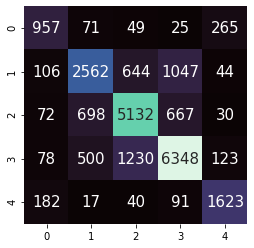

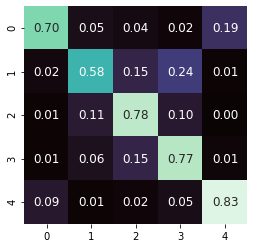

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_correct_concat 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8431
	Drop Total Sample: 		4013.0000
--------------------------------------------------------------------------------



In [ ]:
incorrect_type = 'correct'
company_embedding_method = 'concat'
model_name = '_'.join([pretrained_bert_name, incorrect_type, company_embedding_method])
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/{model_name}/{model_name}_last.ckpt')
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)

[PROGRESS] Saving hyperparameters
[PROGRESS] Initializing BERT model
[PROGRESS] Initializing Company Embedding Layer
[PROGRESS] Initializing classifier
[PROGRESS] Done initialization
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)
Reading Existing Company Only (23781, 9)


[MODEL NAME]: distilbert-base-cased_inverse_sum_embedding 	 [INCORRECT TYPE]: correct
RESULTS:
	Accuracy: 		0.7482
	Weighted Accuracy: 	0.7687
	F1 Score: 		0.7482
	AUC_SCORE[CLS 0]: 	0.9699
	AUC_SCORE[CLS 1]: 	0.8557
	AUC_SCORE[CLS 2]: 	0.8647
	AUC_SCORE[CLS 3]: 	0.9033
	AUC_SCORE[CLS 4]: 	0.9806

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (9) and target (5) number of classes
  warnings.warn(*args, **kwargs)


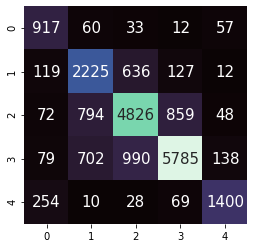

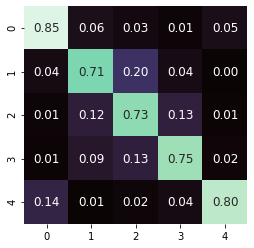

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_embedding 	 [INCORRECT TYPE]: inverse
RESULTS:
	Accuracy: 		0.6847
	Weighted Accuracy: 	0.6890
	F1 Score: 		0.6847
	AUC_SCORE[CLS 0]: 	0.9591
	AUC_SCORE[CLS 1]: 	0.7915
	AUC_SCORE[CLS 2]: 	0.8639
	AUC_SCORE[CLS 3]: 	0.8543
	AUC_SCORE[CLS 4]: 	0.9675

Confusion Matrix


/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:45: RuntimeWarning: You have set 5 number of classes which is different from predicted (9) and target (5) number of classes
  warnings.warn(*args, **kwargs)


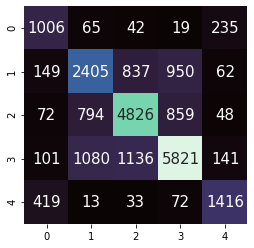

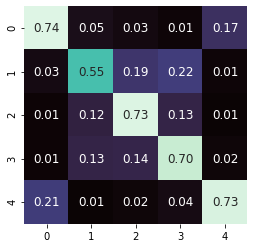

--------------------------------------------------------------------------------



[MODEL NAME]: distilbert-base-cased_inverse_sum_embedding 	 [INCORRECT TYPE]: boundary
	Boundary Accuracy: 		0.8035
	Drop Total Sample: 		4440.0000
--------------------------------------------------------------------------------



In [ ]:
incorrect_type = 'inverse'
company_embedding_method = 'sum_embedding'
model_name = 'distilbert-base-cased_inverse_sum_embedding_cpy_wt1'
model = FinSentiment.load_from_checkpoint(f'experiments/saved_models/{model_name}/{model_name}_last.ckpt')
evaluate_model(model, tokenizer, trainer, existing_company_only=True, dir_path='data/',batch_size=16, num_workers=4)